# Check traces in ks3

We use Buccino traces as reference as they have good sorting accuracy.

Kilosort3 operations:
- read raw traces
- pad traces
- high-bass filter + detrending
- whitening

[BUG]:
- fix why Raw traces read in Kilosort3 are wrong for npx32 but good for Buccino.

[TODO]:
- check that the raw and wired (unpreprocessed) traces output by Spikeinterface are same as the raw traces read in Kilosort3 before preprocessing.

## Setup

setup `npx_10_384ch_unit_classes`

Trace plots are created at different steps of trace preprocessing in `/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/3_sfn_2023/controls/sorters/Kilosort3_to_check_traces/preProcess/preprocessDataSub.m`

and `/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/3_sfn_2023/controls/sorters/Kilosort3_to_check_traces_buccino/preProcess/preprocessDataSub.m`

In [35]:
%load_ext autoreload
%autoreload 2

import os
import scipy
from matplotlib import pyplot as plt
import numpy as np

# move to project path
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/sfn_2023/"
os.chdir(PROJ_PATH)
from src.nodes.dataeng.silico import probe_wiring
from src.nodes.utils import get_config


# SETUP PARAMETERS
EXPERIMENT = "buccino_2020" 
SIMULATION_DATE = "2020"
data_conf_bucci, _ = get_config(EXPERIMENT, SIMULATION_DATE).values()

# SETUP PARAMETERS
EXPERIMENT = "silico_neuropixels"
SIMULATION_DATE = "2023_10_01"      # disconnected 
data_conf_32, _ = get_config(EXPERIMENT, SIMULATION_DATE).values()

# SET KILOSORT3 INSPECTION FIGURE READ PATHS
# npx32
FIG_NPX32 = "/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/3_sfn_2023/controls/sorters/Kilosort3_to_check_traces/KS3_output/figure_raw_traces.svg"
NPX32_BINARY_FILE = "/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/3_sfn_2023/controls/sorters/Kilosort3_to_check_traces/KS3_output/recording.dat"

# buccino
FIG_BUCCI = "/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/3_sfn_2023/controls/sorters/Kilosort3_to_check_traces_buccino/KS3_output/figure_raw_traces.svg"
BUCCI_BINARY_FILE = "/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/3_sfn_2023/controls/sorters/Kilosort3_to_check_traces_buccino/KS3_output/recording.dat"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2023-10-11 10:11:22,499 - root - utils.py - get_config - INFO - Reading experiment config.
2023-10-11 10:11:22,509 - root - utils.py - get_config - INFO - Reading experiment config. - done
2023-10-11 10:11:22,510 - root - utils.py - get_config - INFO - Reading experiment config.
2023-10-11 10:11:22,522 - root - utils.py - get_config - INFO - Reading experiment config. - done


### For npx32 (2023-10.01)

* a batch size is 32 electrodes by 65792 timepoints.

Run in terminal: 
```bash
bash /gpfs/bbp.cscs.ch/project/proj68/home/laquitai/sfn_2023/src/pipes/controls/check_traces_in_ks3.sh
```

### for Buccino

* a batch size is 384 electrodes x 65792 timepoints

Run in terminal: 
```bash
bash /gpfs/bbp.cscs.ch/project/proj68/home/laquitai/sfn_2023/src/pipes/controls/check_buccino_traces_in_ks3.sh
```

## Plot

### npx32 (2023-10-01) raw - first batch

trace shape: (32, 65792)


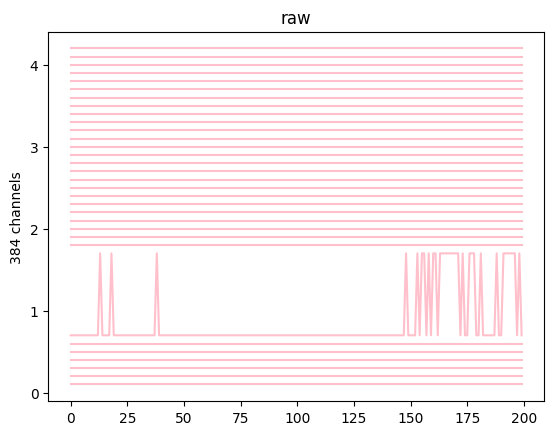

In [8]:
# RAW -----------------

raw_trace_first = scipy.io.loadmat("/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/3_sfn_2023/controls/sorters/Kilosort3_to_check_traces/KS3_output/raw_trace_first_batch.mat")
print("trace shape:", raw_trace_first["buff"].shape)

# plot 32 contacts x 5 ms (like Trautmann et al 2023)
sampfreq = 10000    # Hz
duration = 20       # in ms
n_timepoints = int(duration*sampfreq/1000)

# plot 32 contacts
fig, ax = plt.subplots(1,1)
pos_up = 0
for contact_i in np.arange(0,32,1):
    pos_up += 0.1
    ax.plot(raw_trace_first["buff"][contact_i, -n_timepoints:] + pos_up, color="pink")
ax.set_ylabel("384 channels");
ax.set_title("raw");

# # PADDING ---------------

# padded_trace = scipy.io.loadmat("/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/3_sfn_2023/controls/sorters/Kilosort3_to_check_traces/KS3_output/padded_trace_first_batch.mat")
# print("trace shape:", padded_trace["buff"].shape)

# # plot 32 contacts
# fig, ax = plt.subplots(1,1)
# pos_up = 0
# for contact_i in np.arange(0,32,1):
#     pos_up += 0.1
#     ax.plot(padded_trace["buff"][contact_i, -n_timepoints:] + pos_up, color="pink")
# ax.set_ylabel("384 channels");
# ax.set_title("padded");

Check that raw trace output by Spikeinterface is same as raw trace read by Kilosort3

In [9]:
# check values against spikeinterface's values
print("Raw read by Kilosort3:", raw_trace_first["buff"][0,:10])

# Same from SpikeInterface
WiredRecording = probe_wiring.load(data_conf_32)
raw_trace = WiredRecording.get_traces()
print(raw_trace.shape)
print("Raw output by SpikeInterface:", raw_trace[:10, 0])

Raw read by Kilosort3: [0 0 0 0 0 0 0 0 0 0]
(5880000, 32)
Raw output by SpikeInterface: [0.72255075 0.71714395 0.71778154 0.7193914  0.71719056 0.72362596
 0.71842676 0.7189431  0.72145504 0.71887803]


In [10]:
myarray = np.fromfile(NPX32_BINARY_FILE, dtype=float)
np.unique(myarray)

array([0.00000000e+000, 1.39067116e-309, 1.39069238e-309, 1.39069238e-309,
       1.39069238e-309])

### Mid-batch

In [300]:
# # plot 32 contacts x 5 ms (like Trautmann et al 2023)
# sampfreq = 10000    # Hz
# duration = 20       # in ms
# n_timepoints = int(duration*sampfreq/1000)

# # RAW -------------

# raw_trace_mid = scipy.io.loadmat("/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/3_sfn_2023/controls/sorters/Kilosort3_to_check_traces/KS3_output/raw_trace_mid_batch.mat")

# # plot 32 contacts x 5 ms (like Trautmann et al 2023)
# fig, ax = plt.subplots(1,1)
# pos_up = 0
# for contact_i in np.arange(0,32,1):
#     pos_up += 0.1
#     ax.plot(raw_trace_mid["buff"][contact_i, -n_timepoints:] + pos_up, color="pink")
# ax.set_ylabel("32 channels");


# # PADDING -------------

# padded_trace = scipy.io.loadmat("/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/3_sfn_2023/controls/sorters/Kilosort3_to_check_traces/KS3_output/padded_trace_mid_batch.mat")

# # plot 32 contacts x 5 ms (like Trautmann et al 2023)
# fig, ax = plt.subplots(1,1)
# pos_up = 0
# for contact_i in np.arange(0,32,1):
#     pos_up += 0.1
#     ax.plot(padded_trace["buff"][contact_i, -n_timepoints:] + pos_up, color="pink")
# ax.set_ylabel("32 channels");

### Preprocessed

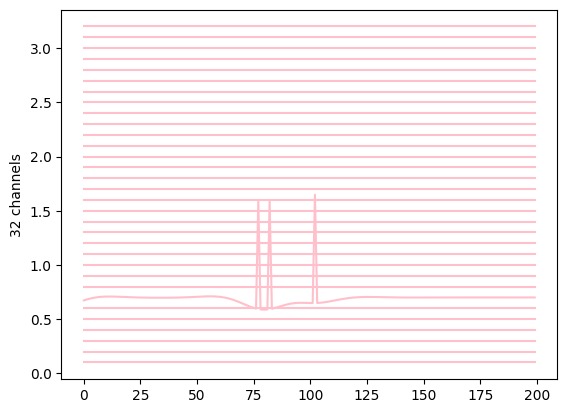

In [11]:
# FIRST BATCH -------------
prep_trace = scipy.io.loadmat("/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/3_sfn_2023/controls/sorters/Kilosort3_to_check_traces/KS3_output/prep_trace_first_batch.mat")

# plot 32 contacts x 5 ms (like Trautmann et al 2023)
sampfreq = 10000    # Hz
duration = 20       # in ms
n_timepoints = int(duration*sampfreq/1000)

# plot 32 contacts
fig, ax = plt.subplots(1,1)
pos_up = 0
for contact_i in np.arange(0,32,1):
    pos_up += 0.1
    ax.plot(prep_trace["prep"][-n_timepoints:, contact_i] + pos_up, color="pink")
ax.set_ylabel("32 channels");


# # MID BATCH -------------
# prep_trace = scipy.io.loadmat("/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/3_sfn_2023/controls/sorters/Kilosort3_to_check_traces/KS3_output/prep_trace_mid_batch.mat")

# # plot 32 contacts x 5 ms (like Trautmann et al 2023)
# sampfreq = 10000    # Hz
# duration = 20       # in ms
# n_timepoints = int(duration*sampfreq/1000)

# # plot 32 contacts
# fig, ax = plt.subplots(1,1)
# pos_up = 0
# for contact_i in np.arange(0,32,1):
#     pos_up += 0.1
#     ax.plot(prep_trace["prep"][-n_timepoints:, contact_i] + pos_up, color="pink")
# ax.set_ylabel("32 channels");

### Buccino raw

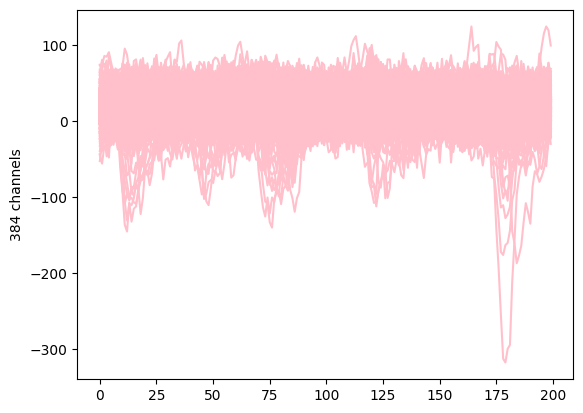

In [16]:
# FIRST BATCH ---------

raw_trace_first = scipy.io.loadmat("/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/3_sfn_2023/controls/sorters/Kilosort3_to_check_traces_buccino/KS3_output/raw_trace_first_batch.mat")

# plot 32 contacts x 5 ms (like Trautmann et al 2023)
sampfreq = 10000    # hz
duration = 20       # in ms
n_timepoints = int(duration*sampfreq/1000)

# plot 32 contacts
fig, ax = plt.subplots(1,1)
pos_up = 0
for contact_i in np.arange(0,384,1):
    pos_up += 0.1
    ax.plot(raw_trace_first["buff"][contact_i, -n_timepoints:] + pos_up, color="pink");

ax.set_ylabel("384 channels");


# # MID BATCH ---------

# raw_trace_mid = scipy.io.loadmat("/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/3_sfn_2023/controls/sorters/Kilosort3_to_check_traces_buccino/KS3_output/raw_trace_mid_batch.mat")

# # plot 32 contacts x 5 ms (like Trautmann et al 2023)
# sampfreq = 10000    # hz
# duration = 20       # in ms
# n_timepoints = int(duration*sampfreq/1000)

# # plot 32 contacts
# fig, ax = plt.subplots(1,1)
# pos_up = 0
# for ix in np.arange(0,384,1):
#     pos_up += 0.1
#     ax.plot(raw_trace_mid["buff"][contact_i, -n_timepoints:] + pos_up, color="pink");

# ax.set_ylabel("384 channels");

In [17]:
# GOOD !

# check values against spikeinterface's values
print("Raw read by Kilosort3:", raw_trace_first["buff"][0,:10])

# Same from SpikeInterface
WiredRecording = probe_wiring.load(data_conf_bucci)
raw_trace = WiredRecording.get_traces()
print("Raw output by SpikeInterface:", raw_trace[:10, 0])

Raw read by Kilosort3: [ 18   0   6  21  15 -17  -2 -15 -13  -4]
Raw output by SpikeInterface: [ 18.23664      0.92844653   6.76838     21.004091    15.855583
 -17.398735    -2.7348175  -15.406563   -13.331718    -4.3076596 ]


In [18]:
# TODO: check this ...
myarray = np.fromfile(BUCCI_BINARY_FILE, dtype=np.int16)
myarray

array([18,  5,  3, ..., -4,  9, -6], dtype=int16)

### Preprocessed

- pink (first neuropixels column), blue (second column), red (thrid column), black (fourth column)

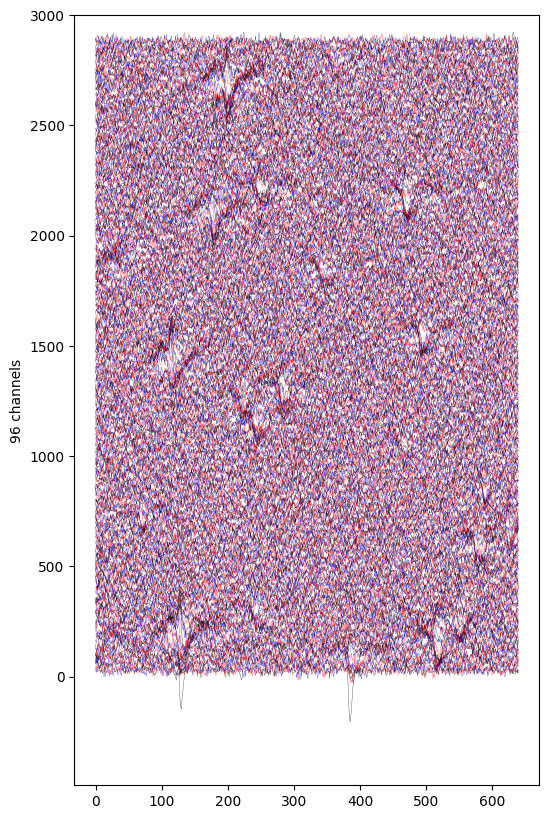

In [19]:
# FIRST BATCH --------------

# plot
LINEWIDTH = 0.2
Y_STEP = 30
Y_MAX = 3000

# get first batch of raw trace
prep_trace = scipy.io.loadmat("/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/3_sfn_2023/controls/sorters/Kilosort3_to_check_traces_buccino/KS3_output/prep_trace_first_batch.mat")

# plot (traces in the same row across columns are at the same depth)

# plot 384 contacts x 5 ms (like Trautmann et al 2023)
sampfreq = 32000    # hz
duration = 20       # in ms
n_timepoints = int(duration*sampfreq/1000)

# plot 32 contacts (0: bottom 96:top)
fig, ax = plt.subplots(1,1, figsize=(6,10))
pos_up = 0
row = 0
for contact_i in np.arange(0,96,1):
    row+=1
    pos_up += Y_STEP
    ax.plot(prep_trace["prep"][-n_timepoints:, contact_i] + pos_up, linewidth=LINEWIDTH, color="pink");
ax.set_ylabel("96 channels");
ax.set_ylim([np.min(prep_trace["prep"]), Y_MAX]);

# plot 32 contacts (97: bottom 192:top)
pos_up = 0
row = 0
for contact_i in np.arange(96,192,1):
    row+=1
    pos_up += Y_STEP
    ax.plot(prep_trace["prep"][-n_timepoints:, contact_i] + pos_up, linewidth=LINEWIDTH, color="blue");

# plot 32 contacts (193: bottom 288:top)
pos_up = 0
row = 0
for contact_i in np.arange(192,288,1):
    row+=1
    pos_up += Y_STEP
    ax.plot(prep_trace["prep"][-n_timepoints:, contact_i] + pos_up, linewidth=LINEWIDTH, color="red");

# plot 32 contacts (289: bottom 384:top)
pos_up = 0
row = 0
for contact_i in np.arange(288,384,1):
    row+=1
    pos_up += Y_STEP
    ax.plot(prep_trace["prep"][-n_timepoints:, contact_i] + pos_up, linewidth=LINEWIDTH, color="black");



# # MID BATCH --------------

# # get first batch of raw trace
# prep_trace = scipy.io.loadmat("/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/3_sfn_2023/controls/sorters/Kilosort3_to_check_traces_buccino/KS3_output/prep_trace_mid_batch.mat")

# # plot (traces in the same row across columns are at the same depth)

# # plot 384 contacts x 5 ms (like Trautmann et al 2023)
# sampfreq = 32000    # hz
# duration = 20       # in ms
# n_timepoints = int(duration*sampfreq/1000)

# # plot 32 contacts (0: bottom 96:top)
# fig, ax = plt.subplots(1,1, figsize=(6,10))
# pos_up = 0
# row = 0
# for contact_i in np.arange(0,96,1):
#     row+=1
#     pos_up += Y_STEP
#     ax.plot(prep_trace["prep"][-n_timepoints:, contact_i] + pos_up, linewidth=LINEWIDTH, color="pink");
# ax.set_ylabel("96 channels");
# ax.set_ylim([np.min(prep_trace["prep"]), Y_MAX]);

# # plot 32 contacts (97: bottom 192:top)
# pos_up = 0
# row = 0
# for contact_i in np.arange(96,192,1):
#     row+=1
#     pos_up += Y_STEP
#     ax.plot(prep_trace["prep"][-n_timepoints:, contact_i] + pos_up, linewidth=LINEWIDTH, color="blue");

# # plot 32 contacts (193: bottom 288:top)
# pos_up = 0
# row = 0
# for contact_i in np.arange(192,288,1):
#     row+=1
#     pos_up += Y_STEP
#     ax.plot(prep_trace["prep"][-n_timepoints:, contact_i] + pos_up, linewidth=LINEWIDTH, color="red");

# # plot 32 contacts (289: bottom 384:top)
# pos_up = 0
# row = 0
# for contact_i in np.arange(288,384,1):
#     row+=1
#     pos_up += Y_STEP
#     ax.plot(prep_trace["prep"][-n_timepoints:, contact_i] + pos_up, linewidth=LINEWIDTH, color="black");

In [164]:
params = scipy.io.loadmat("/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/3_sfn_2023/controls/sorters/Kilosort3_to_check_traces_buccino/KS3_output/chanMap.mat")
print("channel mapping:", params["chanMap"])

channel mapping: [[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
   19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
   37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
   55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
   73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
   91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
  109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
  127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
  145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
  163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
  181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
  199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
  217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
  235 236 237 238 239

Compare recording traces
- nearly all npx32 are distributed below an amplitude of 1 -> int16 during binary conversion will create lots of 0 missing all spikes with amplitude below 0.
- Can we rescale the traces ?

(5880000, 32)
Raw output by SpikeInterface: [0.72255075 0.71714395 0.71778154 0.7193914  0.71719056 0.72362596
 0.71842676 0.7189431  0.72145504 0.71887803]
1.8234197


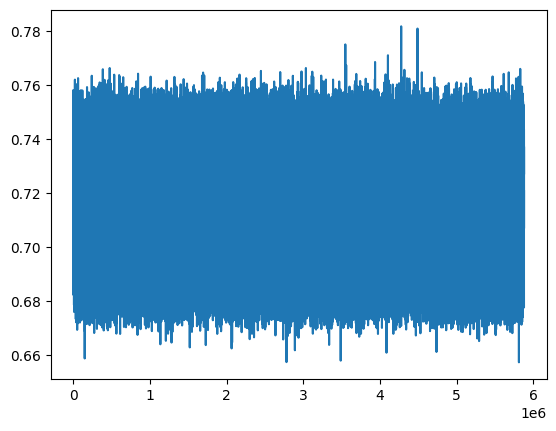

In [15]:
# Same from SpikeInterface
WiredRecording = probe_wiring.load(data_conf_32)
raw_trace_32 = WiredRecording.get_traces()
print(raw_trace_32.shape)
print("Raw output by SpikeInterface:", raw_trace_32[:10, 0])

print(np.max(raw_trace_32))
plt.plot(raw_trace_32[:,0]);

(19200000, 384)
Raw output by SpikeInterface: [ 18.23664      0.92844653   6.76838     21.004091    15.855583
 -17.398735    -2.7348175  -15.406563   -13.331718    -4.3076596 ]


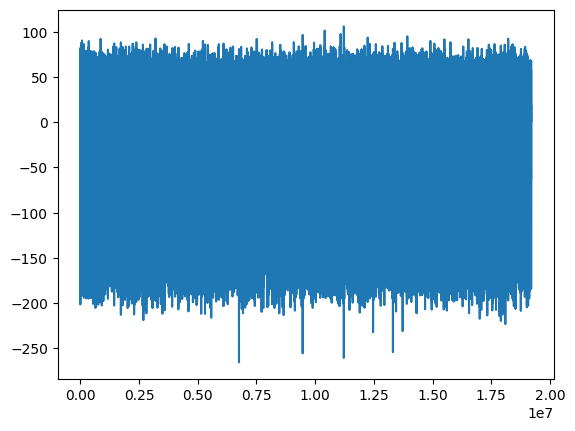

In [13]:
# Same from SpikeInterface
WiredRecording = probe_wiring.load(data_conf_bucci)
raw_trace = WiredRecording.get_traces()
print(raw_trace.shape)
print("Raw output by SpikeInterface:", raw_trace[:10, 0])

plt.plot(raw_trace[:,0]);

# References

binary recording .dat is created here `spikeinterface.sorters.kilosortbase._setup_recording` with dtype `int16` called from `BaseSorter` in `Class Kilosort3Sorter(KilosortBase, BaseSorter)`

That's where matkab Kilosort3 is actually launched